In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
#Import data from CSV
df_loan = pd.read_csv("loan.csv")

D:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,975107,1198008,34475,34475,34475.0,60 months,14.27%,807.01,C,C2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,843071,1053804,35000,35000,10375.0,60 months,20.99%,946.68,F,F3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1006411,1232830,35000,35000,34975.0,60 months,20.30%,933.14,E,E5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,672680,859881,35000,35000,34950.0,60 months,16.40%,858.59,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,790088,994159,35000,35000,34975.0,60 months,15.99%,850.95,D,D2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Part 1: Data Cleaning

In [4]:
# Remove columns having no values
df_loan = df_loan.dropna(axis=1, how="all")

In [5]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,975107,1198008,34475,34475,34475.0,60 months,14.27%,807.01,C,C2,...,NaN,Mar-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,843071,1053804,35000,35000,10375.0,60 months,20.99%,946.68,F,F3,...,NaN,Mar-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1006411,1232830,35000,35000,34975.0,60 months,20.30%,933.14,E,E5,...,NaN,Dec-11,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,672680,859881,35000,35000,34950.0,60 months,16.40%,858.59,E,E1,...,NaN,Mar-11,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,790088,994159,35000,35000,34975.0,60 months,15.99%,850.95,D,D2,...,NaN,Aug-11,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [6]:
df_loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [7]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [8]:
# Remove columns which are not required for this analysis
# id - not required
# member_id - not required
# funded_amnt - will use funded_amnt_inv for analysis
# emp_title - Not required
# pymnt_plan - not required as it contains only 'n' value for all rows
# url - not required
# desc - not required, will use 'purpose' instead
# title - several distinct value whic are not useful
# zip_code - only partial values available
# delinq_2yrs - assume this data is generated post approval of loan so not useful for decision making.
# mths_since_last_delinq - data generated post approval
# mths_since_last_record - data generated post approval
# revol_bal - data generated post approval
# initial_list_status - it contains only 'f' value for all rows
# out_prncp - data generated post approval
# out_prncp_inv - data generated post approval
# total_pymnt - data generated post approval
# total_pymnt_inv - data generated post approval
# total_rec_prncp - data generated post approval
# total_rec_int - data generated post approval
# total_rec_late_fee - data generated post approval
# recoveries - data generated post approval
# collection_recovery_fee - data generated post approval
# last_pymnt_d - data generated post approval
# last_pymnt_amnt - data generated post approval
# next_pymnt_d - data generated post approval
# last_credit_pull_d - data generated post approval
# collections_12_mths_ex_med - it contains only zero value 
# policy_code - it contains only one value 
# application_type - it contains only one value 
# acc_now_delinq - it contains only zero value 
# chargeoff_within_12_mths - it contains only either zero or 'NA' values
# delinq_amnt - data generated post approval
# tax_liens - it contains only zero value 

ColsNotRequired = ["id", "member_id", "funded_amnt", "emp_title", "pymnt_plan", "url", "desc", "title", "zip_code", "delinq_2yrs", "mths_since_last_delinq", "mths_since_last_record", "revol_bal", "initial_list_status", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d", "last_credit_pull_d", "collections_12_mths_ex_med", "policy_code", "application_type", "acc_now_delinq", "chargeoff_within_12_mths", "delinq_amnt", "tax_liens"]

df_loan.drop(ColsNotRequired, axis=1, inplace=True)

In [9]:
df_loan.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,34475,34475.0,60 months,14.27%,807.01,C,C2,10+ years,RENT,73000.0,...,other,MN,29.56,May-95,3,19,0,18.30%,46,0.0
1,35000,10375.0,60 months,20.99%,946.68,F,F3,2 years,MORTGAGE,350000.0,...,home_improvement,CT,12.95,Jan-91,0,18,0,43.40%,30,0.0
2,35000,34975.0,60 months,20.30%,933.14,E,E5,3 years,MORTGAGE,136000.0,...,home_improvement,CA,2.56,Mar-98,2,6,0,59%,28,0.0
3,35000,34950.0,60 months,16.40%,858.59,E,E1,< 1 year,OWN,75000.0,...,debt_consolidation,NJ,10.11,Feb-91,0,14,0,0.80%,19,0.0
4,35000,34975.0,60 months,15.99%,850.95,D,D2,8 years,MORTGAGE,129500.0,...,home_improvement,NJ,15.55,Aug-03,0,18,0,4.10%,23,0.0


In [10]:
# remove % symbol from intrest rate column 
df_loan['int_rate'] = df_loan['int_rate'].str.rstrip('%')

#  remove % symbol from revol_util column 
df_loan['revol_util'] = df_loan['revol_util'].str.rstrip('%')

In [11]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt_inv       39717 non-null  float64
 2   term                  39717 non-null  object 
 3   int_rate              39717 non-null  object 
 4   installment           39717 non-null  float64
 5   grade                 39717 non-null  object 
 6   sub_grade             39717 non-null  object 
 7   emp_length            38642 non-null  object 
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  addr_state            39717 non-null  object 
 15  dti                

In [12]:
#  format employment length column to have only numbers. 

df_loan.emp_length.fillna('0',inplace=True)
df_loan['emp_length']=df_loan.emp_length.str.extract('(\d+)')
df_loan.head(2)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,34475,34475.0,60 months,14.27,807.01,C,C2,10,RENT,73000.0,...,other,MN,29.56,May-95,3,19,0,18.30,46,0.0
1,35000,10375.0,60 months,20.99,946.68,F,F3,2,MORTGAGE,350000.0,...,home_improvement,CT,12.95,Jan-91,0,18,0,43.40,30,0.0


In [13]:
# convert amount columns into numeric data to find some correlation among important ones.

cols1 = ['funded_amnt_inv','int_rate','installment','annual_inc','dti','emp_length','pub_rec_bankruptcies']
df_loan[cols1] = df_loan[cols1].apply(pd.to_numeric)
df_loan.head(2)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,34475,34475.0,60 months,14.27,807.01,C,C2,10,RENT,73000.0,...,other,MN,29.56,May-95,3,19,0,18.30,46,0.0
1,35000,10375.0,60 months,20.99,946.68,F,F3,2,MORTGAGE,350000.0,...,home_improvement,CT,12.95,Jan-91,0,18,0,43.40,30,0.0


In [14]:
# Check the percentage of each values in 'loan status' 

(df_loan.loan_status.value_counts()*100)/len(df_loan)



Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64


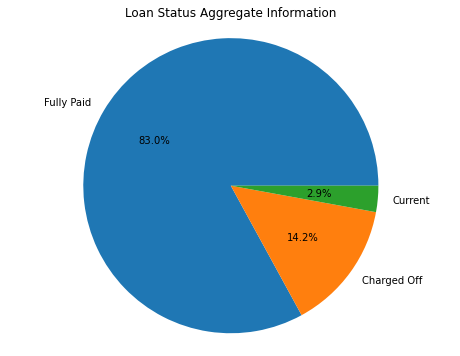

In [15]:
print(df_loan['loan_status'].value_counts())
loan_status_labels = 'Fully Paid','Charged Off','Current'
plt.rcParams['figure.figsize'] = (8, 6)
plt.pie(df_loan['loan_status'].value_counts(),labels=loan_status_labels,autopct='%1.1f%%')
plt.title('Loan Status Aggregate Information')
plt.axis('equal')
plt.show()

#### Observations
> 82.9 percent loans were fully paid.
> 14.2 % loans were charged off

In [16]:
# Next analyze another important variable 'purpose of loan' in total loans issued

(df_loan.purpose.value_counts()*100)/len(df_loan)



debt_consolidation    46.934562
credit_card           12.916383
other                 10.053629
home_improvement       7.493013
major_purchase         5.506458
small_business         4.602563
car                    3.900093
wedding                2.384369
medical                1.744845
moving                 1.467885
vacation               0.959287
house                  0.959287
educational            0.818289
renewable_energy       0.259335
Name: purpose, dtype: float64

#### Observations
<blockquote> Most of the loans taken for debt consolidation(47%) and Credit card bill payment
# Credit card and Other are also main area where loans were taken.</blockquote>


In [17]:
# Basic statistics with .describe() - Quantitative Variables
df_loan['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

D:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


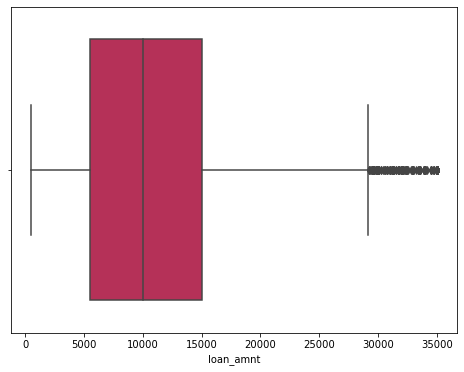

In [18]:
sns.boxplot(df_loan.loan_amnt, palette = 'rocket')
plt.show()

In [19]:
# Basic statistics with .describe() -Quantitative Variables

print('Before Removal of Outliers :\n')
print(df_loan['annual_inc'].describe())

# Data cleaning
# Remove Outliers quantile .99 from Annual Income
# it will make it easier to visualize the plots.

df_loan = df_loan[df_loan["annual_inc"] < df_loan["annual_inc"].quantile(0.99)]

print('After Removal of Outliers :')
print(df_loan["annual_inc"].describe())

# Now below data looks much better. Lets plot later and find some conclusions

Before Removal of Outliers :

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64
After Removal of Outliers :
count     39319.000000
mean      65524.215803
std       35215.885297
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       81000.000000
max      234996.000000
Name: annual_inc, dtype: float64


D:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

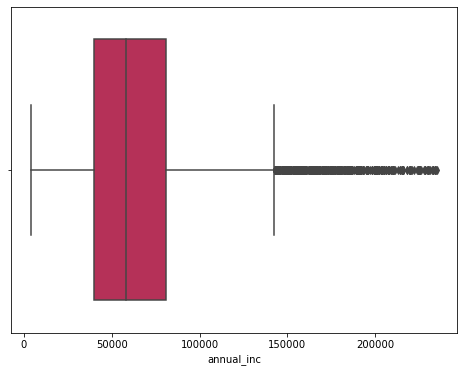

In [20]:
sns.boxplot(df_loan.annual_inc, palette = 'rocket')

In [21]:
# Basic statistics with .describe() -Quantitative Variables

df_loan['int_rate'].describe()

# Average intrest rate is 12 %
# after 75% percentile interest rate increased to 25% from 15%.

count    39319.000000
mean        12.006142
std          3.717367
min          5.420000
25%          9.250000
50%         11.830000
75%         14.540000
max         24.590000
Name: int_rate, dtype: float64

D:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='int_rate'>

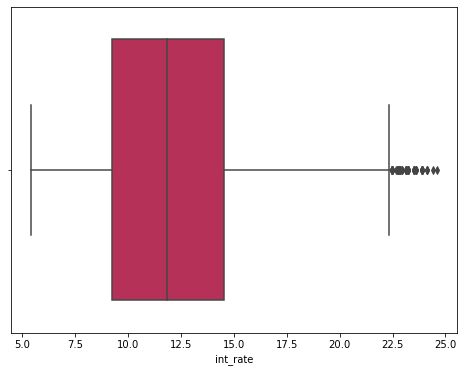

In [22]:
sns.boxplot(df_loan.int_rate, palette = 'rocket')

#### Derived columns

In [23]:

# categorise loan amounts into buckets which will help in analysis further in bivariate analysis.
df_loan['loan_amnt_cats'] = pd.cut(df_loan['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
df_loan['annual_inc_cats'] = pd.cut(df_loan['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
df_loan['int_rate_cats'] = pd.cut(df_loan['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

# categorise dti into buckets for bivariate analysis.
df_loan['dti_cats'] = pd.cut(df_loan['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

### Part 2 - Univariate Analysis

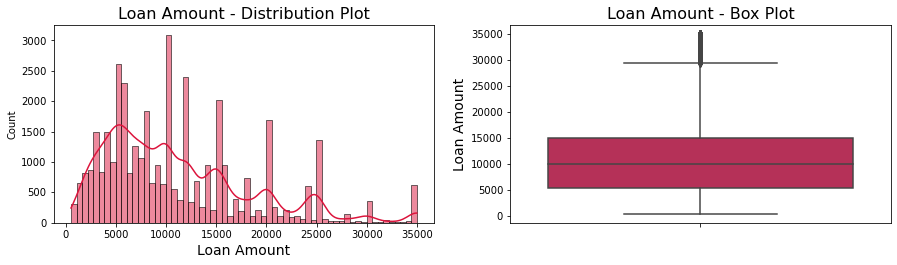

In [24]:
# Univariate Analysis on Loan amount-Quantitative Variables

plt.figure(figsize=(15,8))

# subplot 1
plt.subplot(2, 2, 1)
ax = sns.histplot(data=df_loan, x="loan_amnt", kde = True, color = 'crimson')
ax.set_title('Loan Amount - Distribution Plot',fontsize=16,color='k')
ax.set_xlabel('Loan Amount',fontsize=14,color='k')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=df_loan['loan_amnt'], palette = 'rocket')
ax.set_title('Loan Amount - Box Plot',fontsize=16,color='k')
ax.set_ylabel('Loan Amount',fontsize=14,color='k')
plt.show()



#### Observations :
> Plots shows that most of the Loan amounts are in range of 5000 - 15000

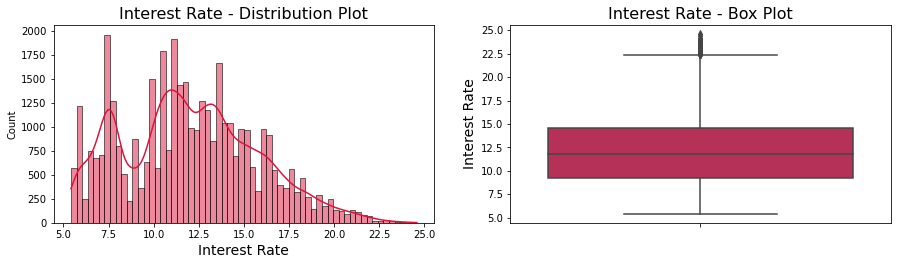

In [25]:
# Univariate Analysis on Intrest Rate-Quantitative Variables

plt.figure(figsize=(15,8))

# subplot 1
plt.subplot(2, 2, 1)
ax = sns.histplot(data=df_loan, x="int_rate", kde = True, color = 'crimson')
ax.set_title('Interest Rate - Distribution Plot',fontsize=16,color='k')
ax.set_xlabel('Interest Rate',fontsize=14,color='k')

# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=df_loan['int_rate'], palette = 'rocket')
ax.set_title('Interest Rate - Box Plot',fontsize=16,color='k')
ax.set_ylabel('Interest Rate',fontsize=14,color='k')
plt.show()



#### Observations :
> Plots show that most of the Interest Rates on loans are in range of 10% - 15%

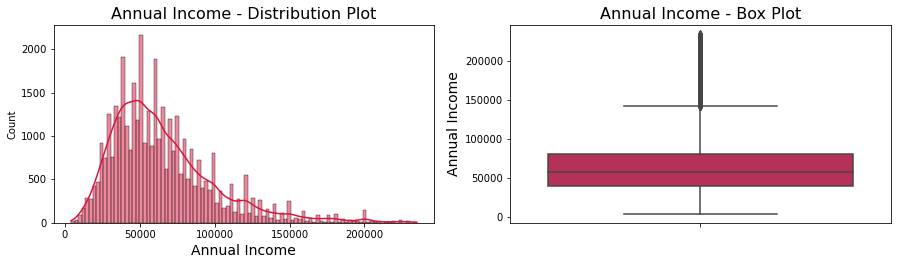

In [26]:
# Univariate Analysis on Annual Income - Quantitative Variables

plt.figure(figsize=(15,8))

# subplot 1
plt.subplot(2, 2, 1)
ax = sns.histplot(data=df_loan, x="annual_inc", kde = True, color = 'crimson')
ax.set_title('Annual Income - Distribution Plot',fontsize=16,color='k')
ax.set_xlabel('Annual Income',fontsize=14,color='k')
# subplot 2
plt.subplot(2, 2, 2)
plt.title('Annual Income - Box Plot')
ax = sns.boxplot(y=df_loan['annual_inc'], palette = 'rocket')
ax.set_title('Annual Income - Box Plot',fontsize=16,color='k')
ax.set_ylabel('Annual Income',fontsize=14,color='k')
plt.show()



#### Observations :
> Plots show that most of the borrower's Annual incomes are in range of 40000- 80000

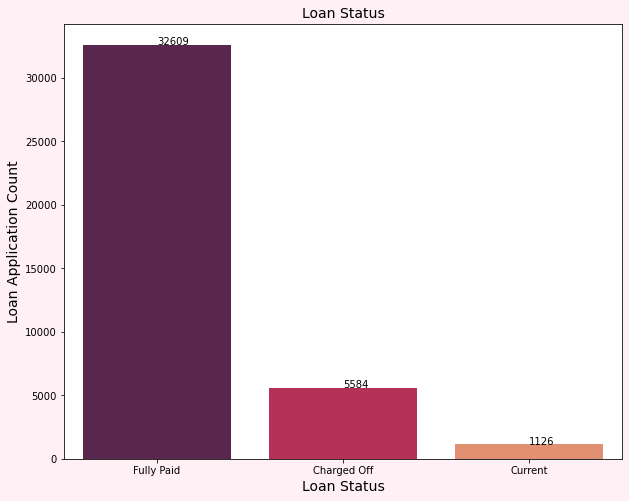

In [27]:
# Univariate Analysis - Unordered Categorical Variables - Loan Status

plt.figure(figsize=(10,8),facecolor='lavenderblush')
ax = sns.countplot(x="loan_status",data=df_loan,palette='rocket')
ax.set_title('Loan Status',fontsize=14,color='k')
ax.set_xlabel('Loan Status',fontsize=14,color = 'k')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'k')            
# To show count of values above bars
s=df_loan['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='k')



#### Observations :
> Plot shows that close to 14% loans were charged off out of total loan issued.

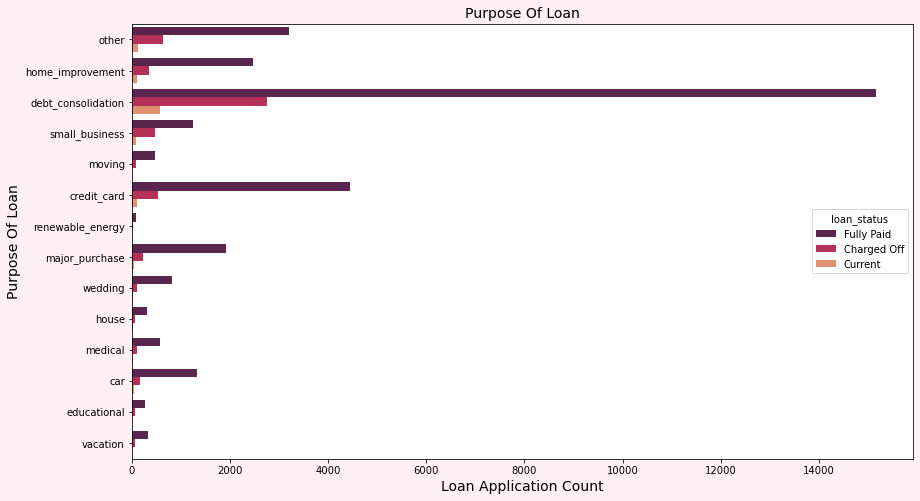

In [28]:
# Univariate Analysis - Unordered Categorical Variables - Purpose Of Loan

plt.figure(figsize=(14,8),facecolor='lavenderblush')
ax = sns.countplot(y="purpose",data=df_loan,hue='loan_status',palette='rocket')
ax.set_title('Purpose Of Loan',fontsize=14,color='k')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'k')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'k')      
plt.show()



#### Observations :
> Plot shows that most of the loans were taken for the purpose of debt consolidation & paying credit card bill.
> Number of chraged off count also high too for these loans.

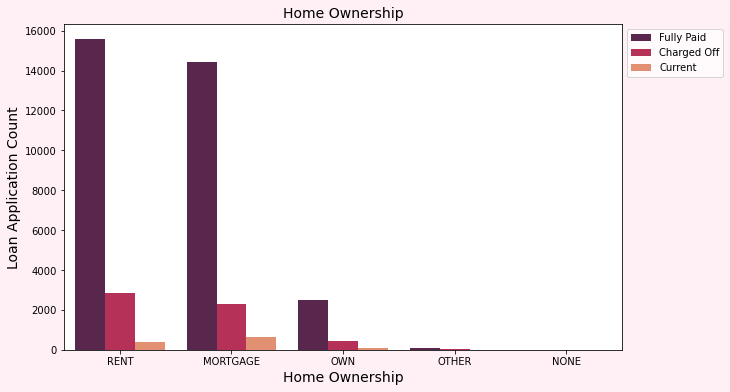

In [29]:
# Univariate Analysis - Unordered Categorical Variables - Home Ownership

plt.figure(figsize=(10,6),facecolor='lavenderblush')
ax = sns.countplot(x="home_ownership",data=df_loan,hue='loan_status',palette='rocket')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color= 'k')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'k')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'k')      
plt.show()



#### Observations :
> Plot shows that most of them living in rented home or mortgazed their home.
> Applicant numbers are high from these categories so charged off is high too.

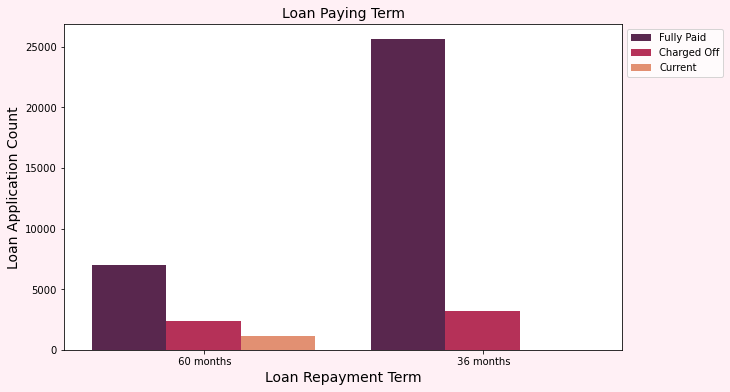

In [30]:
# Univariate Analysis - Ordered Categorical Variables- Loan Paying Term

plt.figure(figsize=(10,6),facecolor='lavenderblush')
ax = sns.countplot(x="term",data=df_loan,hue='loan_status',palette='rocket')
ax.set_title('Loan Paying Term',fontsize=14,color='k')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'k')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'k')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()



#### Observations :
> Plot shows that those who had taken loan to repay in 60 months had more % of number of applicants getting 
> charged off as compared to applicants who had taken loan for 36 months.

### Part 3 - Bivariate Analysis

In [31]:
# Bivariate Analysis on annual income against Chargedoff_Proportion -

inc_range_vs_loan = df_loan.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Current'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)



loan_status,annual_inc_cats,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,237,9,943,1189,0.199327
1,20000-40000,1514,170,7004,8688,0.174263
2,40000-60000,1729,345,9534,11608,0.148949
3,60000-80000,1024,240,6597,7861,0.130263
4,80000 +,1080,362,8531,9973,0.108292


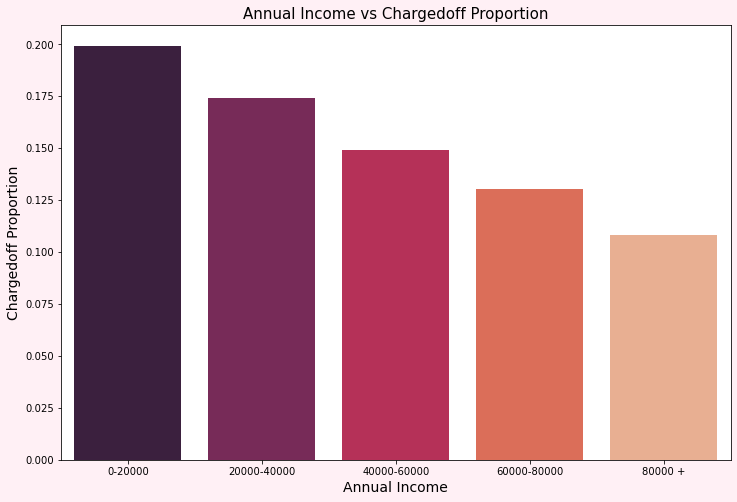

In [32]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='lavenderblush')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'k')
ax1=sns.barplot(x='annual_inc_cats', y='Chargedoff_Proportion', data=inc_range_vs_loan, palette = 'rocket')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'k')
ax1.set_xlabel('Annual Income',fontsize=14,color='k')
plt.show()

#### Observations:
<blockquote> 
Income range 80000+  has less chances of charged off.
    
Income range 0-20000 has high chances of charged off.
    
Charged off proportion is decreased with increase in annual income.
</blockquote>

In [33]:
# Bivariate Analysis on purpose of Loan against Chargedoff_Proportion.

purpose_vs_loan = df_loan.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Current'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,purpose,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
11,small_business,472.0,74.0,1251.0,1797.0,0.262660
10,renewable_energy,19.0,1.0,81.0,101.0,0.188119
3,educational,55.0,0.0,268.0,323.0,0.170279
9,other,629.0,126.0,3203.0,3958.0,0.158919
8,moving,91.0,7.0,479.0,577.0,0.157712
5,house,58.0,14.0,299.0,371.0,0.156334
7,medical,106.0,12.0,568.0,686.0,0.154519
2,debt_consolidation,2752.0,580.0,15165.0,18497.0,0.148781
12,vacation,53.0,6.0,322.0,381.0,0.139108
4,home_improvement,338.0,97.0,2459.0,2894.0,0.116793


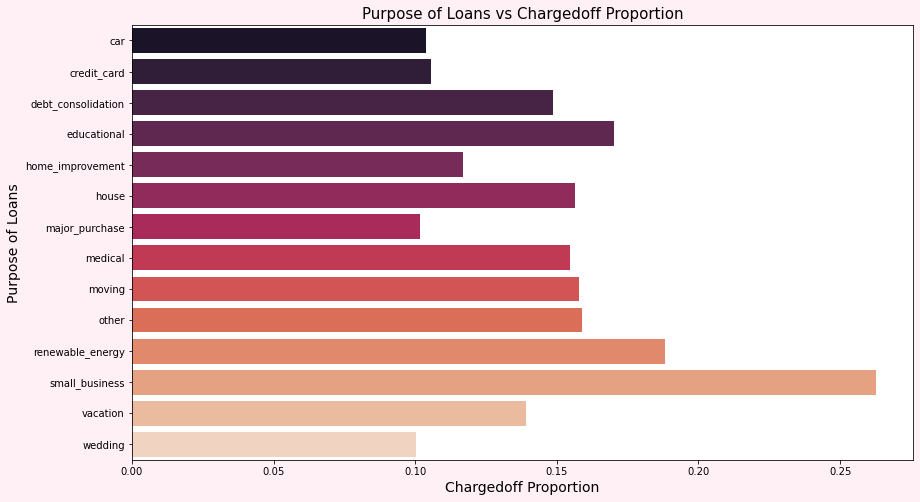

In [34]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.
# pairs of continuous variables.
fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='lavenderblush')
ax1.set_title('Purpose of Loans vs Chargedoff Proportion',fontsize=15,color = 'k')
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan, palette = 'rocket')
ax1.set_ylabel('Purpose of Loans',fontsize=14,color='k')
ax1.set_xlabel('Chargedoff Proportion',fontsize=14,color = 'k')
plt.show()



#### Observations:
> Small Business applicants have high chances of being charged off.
> 
> Renewable_energy and educational is also having high charged off proportion compare to other categories.

In [62]:
# Bivariate Analysis on grade against Chargedoff_Proportion

grade_vs_loan = df_loan.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Current'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
6,G,99,17,190,306,0.323529
5,F,312,71,642,1025,0.304390
4,E,704,176,1906,2786,0.252692
3,D,1112,216,3916,5244,0.212052
2,C,1342,262,6411,8015,0.167436
1,B,1414,344,10167,11925,0.118574
0,A,601,40,9377,10018,0.059992


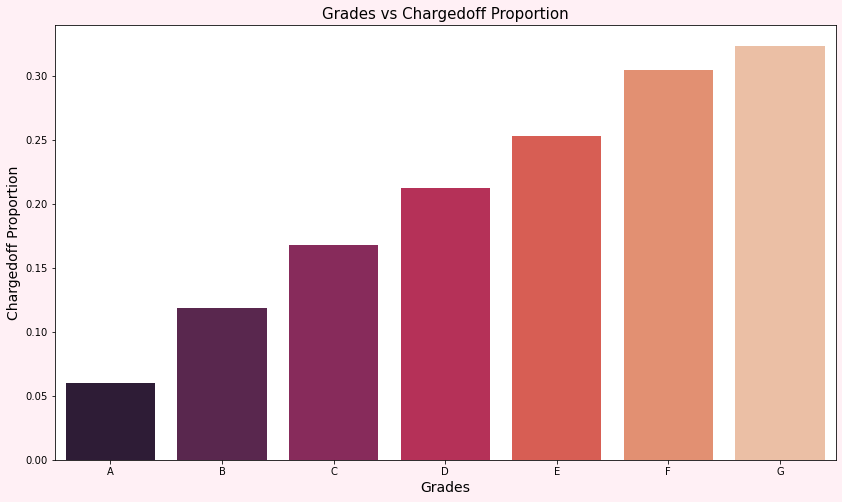

In [63]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='lavenderblush')
ax1.set_title('Grades vs Chargedoff Proportion',fontsize=15,color='k')
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan, palette = 'rocket')
ax1.set_xlabel('Grades',fontsize=14,color='k')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color ='k')
plt.show()



#### Observations:
> Grade "A" has very less chances of charged off.
>
> Grade "F" and "G" have very high chances of charged off.
>
> Chances of charged of is increasing with grade moving from "A" towards "G"

In [37]:
# Understanding grades better
# Bivariate Analysis on sub grade against Chargedoff_Proportion

grade_vs_loan = df_loan.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Current'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,sub_grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
29,F5,53.0,4.0,55.0,112.0,0.473214
32,G3,19.0,3.0,25.0,47.0,0.404255
31,G2,27.0,1.0,47.0,75.0,0.360000
34,G5,10.0,1.0,18.0,29.0,0.344828
28,F4,52.0,17.0,96.0,165.0,0.315152
30,G1,31.0,10.0,61.0,102.0,0.303922
23,E4,126.0,28.0,293.0,447.0,0.281879
26,F2,69.0,16.0,162.0,247.0,0.279352
27,F3,50.0,11.0,118.0,179.0,0.279330
25,F1,88.0,23.0,211.0,322.0,0.273292


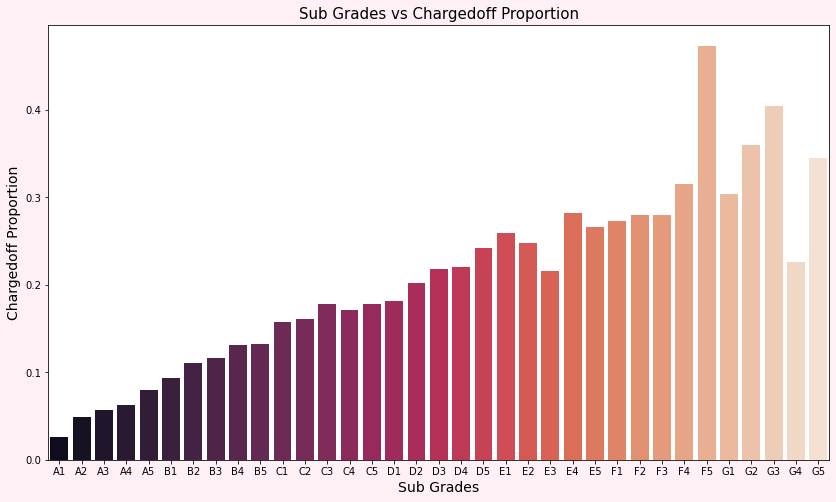

In [38]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='lavenderblush')
ax1.set_title('Sub Grades vs Chargedoff Proportion',fontsize=15,color='k')
ax1=sns.barplot(x='sub_grade', y='Chargedoff_Proportion', data=grade_vs_loan, palette = 'rocket')
ax1.set_xlabel('Sub Grades',fontsize=14,color='k')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'k')
plt.show()



#### Observations:
> Sub Grades of "A" has very less chances of charged off.

> Sub Grades of "F" and "G" have very high chances of charged off.

> Proportion of charged off is increasing with sub grades moving from sub grades of "A" towards sub grades of "G"

In [39]:
# Bivariate Analysis on interest rate against Chargedoff_Proportion

interest_vs_loan = df_loan.groupby(['int_rate_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off'] + interest_vs_loan['Current'] + interest_vs_loan['Fully Paid'] 
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,int_rate_cats,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
3,16 +,1250,351,3317,4918,0.254168
2,12.5-16,1995,329,9354,11678,0.170834
1,10-13,1224,269,8083,9576,0.127820
0,0-10,825,77,11403,12305,0.067046


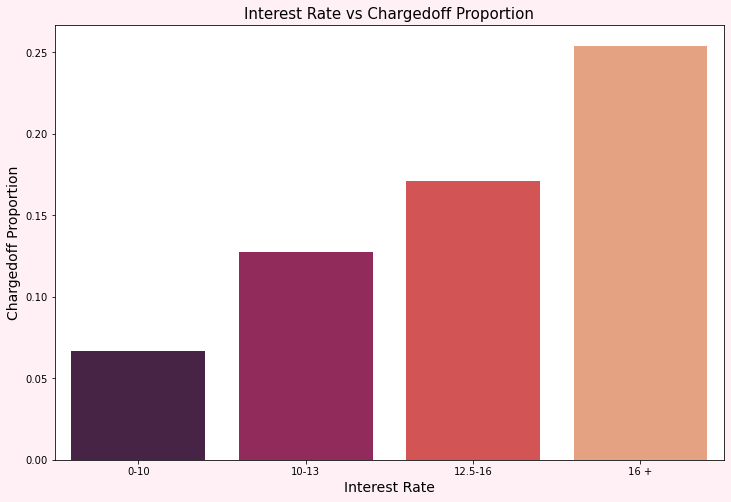

In [40]:
# Lets draw some bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='lavenderblush')
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15,color='k')
ax1=sns.barplot(x='int_rate_cats', y='Chargedoff_Proportion', data=interest_vs_loan, palette = 'rocket')
ax1.set_xlabel('Interest Rate',fontsize=14,color='k')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'k')
plt.show()



#### Observations:
> Interest rate less than 10% has very less chances of charged off. 

> Interest rate more than 16% has good chances of charged off as compared to other category interest rates.

> Charged off proportion is increasing with higher interest rates.

In [41]:
# Bivariate Analysis on employment length against Chargedoff_Proportion

emplen_vs_loan = df_loan.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan['Charged Off'] + emplen_vs_loan['Current'] + emplen_vs_loan['Fully Paid'] 
emplen_vs_loan['Chargedoff_Proportion'] = emplen_vs_loan['Charged Off'] / emplen_vs_loan['Total']
emplen_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)



loan_status,emp_length,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,0,227,42,801,1070,0.212150
10,10,1316,386,7038,8740,0.150572
7,7,262,62,1435,1759,0.148948
1,1,1090,143,6533,7766,0.140355
5,5,456,87,2712,3255,0.140092
8,8,203,43,1216,1462,0.138851
6,6,305,58,1846,2209,0.138072
3,3,551,82,3426,4059,0.135748
4,4,456,94,2860,3410,0.133724
2,2,561,97,3684,4342,0.129203


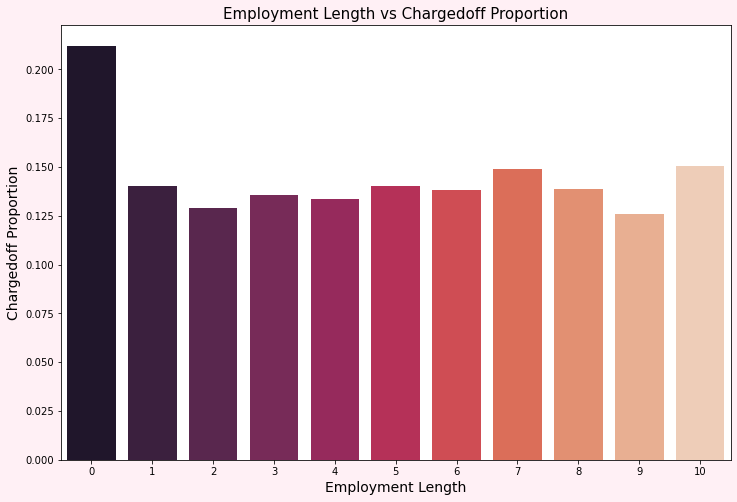

In [42]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='lavenderblush')
ax1.set_title('Employment Length vs Chargedoff Proportion',fontsize=15,color='k')
ax1=sns.barplot(x='emp_length', y='Chargedoff_Proportion', data=emplen_vs_loan, palette = 'rocket')
ax1.set_xlabel('Employment Length',fontsize=14,color='k')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'k')
plt.show()



#### Observations:
> Those who are not working or have less than 1 year of work experience have high chances of getting charged off.

> It makes sense as with less or no experience they don't have source of income to repay loan.

> Rest of the applicants have more or less same chances of getting charged off.

In [43]:
# Bivariate Analysis on address state against Chargedoff_Proportion

state_vs_loan = df_loan.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_vs_loan['Total'] = state_vs_loan['Charged Off'] + state_vs_loan['Current'] + state_vs_loan['Fully Paid'] 
state_vs_loan['Chargedoff_Proportion'] = state_vs_loan['Charged Off'] / state_vs_loan['Total']
state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)



loan_status,addr_state,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
28,NE,3.0,0.0,2.0,5.0,0.600000
32,NV,107.0,17.0,368.0,492.0,0.217480
40,SD,12.0,2.0,50.0,64.0,0.187500
0,AK,14.0,2.0,63.0,79.0,0.177215
9,FL,497.0,85.0,2252.0,2834.0,0.175371
24,MO,114.0,16.0,551.0,681.0,0.167401
13,ID,1.0,0.0,5.0,6.0,0.166667
31,NM,30.0,5.0,149.0,184.0,0.163043
11,HI,28.0,8.0,138.0,174.0,0.160920
4,CA,1116.0,149.0,5767.0,7032.0,0.158703


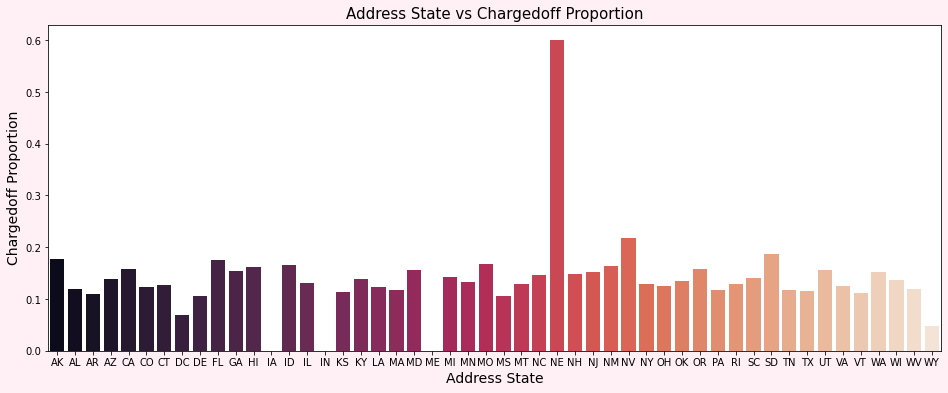

In [44]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(16, 6),facecolor='lavenderblush')
ax1.set_title('Address State vs Chargedoff Proportion',fontsize=15,color='k')
ax1=sns.barplot(x='addr_state', y='Chargedoff_Proportion', data=state_vs_loan, palette = 'rocket')
ax1.set_xlabel('Address State',fontsize=14,color='k')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'k')
plt.show()



#### Observations:
> NE has very high chances of charged off but number of applications are too low to make any decisions.

> NV & SD states shows high number of charged offs with high number of applicants.

In [45]:
# Bivariate Analysis on verification_status against Chargedoff_Proportion

verfy_vs_loan = df_loan.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verfy_vs_loan['Total'] = verfy_vs_loan['Charged Off'] + verfy_vs_loan['Current'] + verfy_vs_loan['Fully Paid'] 
verfy_vs_loan['Chargedoff_Proportion'] = verfy_vs_loan['Charged Off'] / verfy_vs_loan['Total']
verfy_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)



loan_status,verification_status,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
2,Verified,2032,593,10000,12625,0.160950
1,Source Verified,1422,306,8135,9863,0.144175
0,Not Verified,2130,227,14474,16831,0.126552


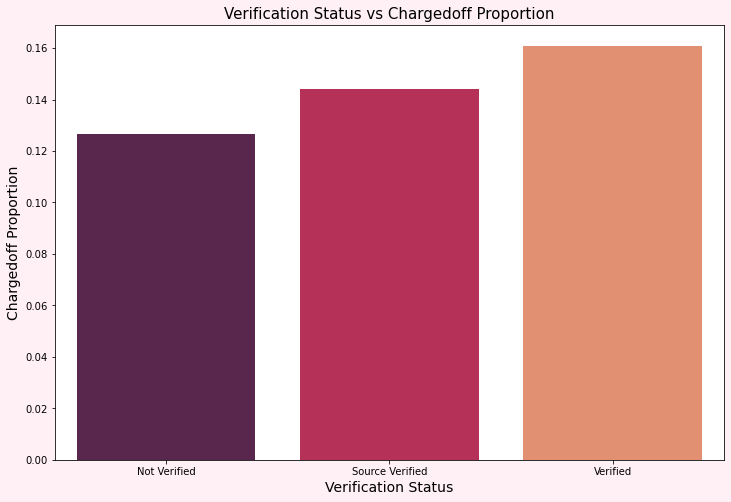

In [46]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='lavenderblush')
ax1.set_title('Verification Status vs Chargedoff Proportion',fontsize=15,color='k')
ax1=sns.barplot(x='verification_status', y='Chargedoff_Proportion', data=verfy_vs_loan, palette = 'rocket')
ax1.set_xlabel('Verification Status',fontsize=14,color='k')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'k')
plt.show()



#### Observations:
> The plot shows more charged off in 'verified' category howeve the variation is minimal hence cannot conclude with that analysis. 



In [47]:
# Bivariate Analysis on pub_rec_bankruptcies against Chargedoff_Proportion

bankruptcies_vs_loan = df_loan.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off']+bankruptcies_vs_loan['Current']+bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,pub_rec_bankruptcies,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
2,2.0,2,2,3,7,0.285714
1,1.0,365,37,1268,1670,0.218563
0,0.0,5101,1087,30766,36954,0.138036


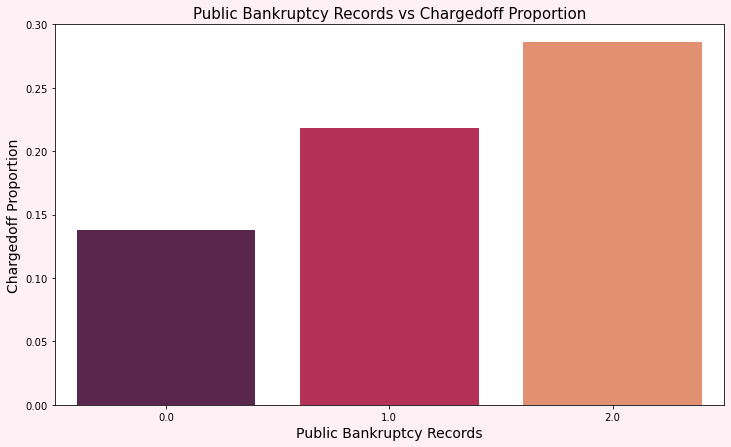

In [48]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 7),facecolor='lavenderblush')
ax1.set_title('Public Bankruptcy Records vs Chargedoff Proportion',fontsize=15,color='k')
ax1=sns.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=bankruptcies_vs_loan, palette = 'rocket')
ax1.set_xlabel('Public Bankruptcy Records',fontsize=14,color='k')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'k')
plt.show()



#### Observations:
> Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies.

> pub_rec_bankruptcies count 2 has even higher charged off proportion but those numbers are not significant to decide.

> This also makes sense that who has defaulted before has more chances of defaulting in future as well.

In [49]:
# Bivariate Analysis on Derogatory Public Record against Chargedoff_Proportion

bankruptcies_vs_loan = df_loan.groupby(['pub_rec', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off']+bankruptcies_vs_loan['Current']+bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,pub_rec,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
1,1,454.0,43.0,1551.0,2048.0,0.22168
2,2,10.0,3.0,37.0,50.0,0.20000
0,0,5120.0,1080.0,31012.0,37212.0,0.13759
3,3,0.0,0.0,7.0,7.0,0.00000
4,4,0.0,0.0,2.0,2.0,0.00000


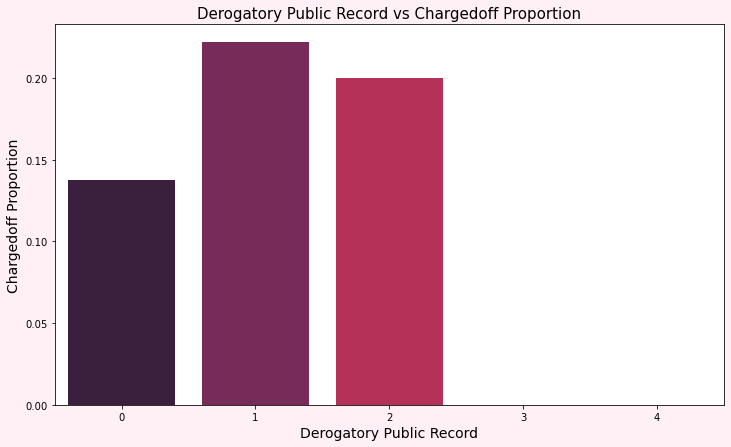

In [50]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 7),facecolor='lavenderblush')
ax1.set_title('Derogatory Public Record vs Chargedoff Proportion',fontsize=15,color='k')
ax1=sns.barplot(x='pub_rec', y='Chargedoff_Proportion', data=bankruptcies_vs_loan, palette = 'rocket')
ax1.set_xlabel('Derogatory Public Record',fontsize=14,color='k')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'k')
plt.show()



#### Observations:
<blockquote> A derogatory item is an entry that may be considered negative by lenders because it indicates risk and hurts 
 your ability to qualify for credit or other services. Public records and collections are derogatory items
 because they reflect financial obligations that were not paid as agreed.
 Those who already have pub_rec value 1 or 2 have charged off chances higher than who have no Derogatory Public Record.
 pub_rec count 3-4 has less numbers so cannot reach on any conclusions.
</blockquote> 

### Part 4 - Bivariate Analysis - Additional analysis

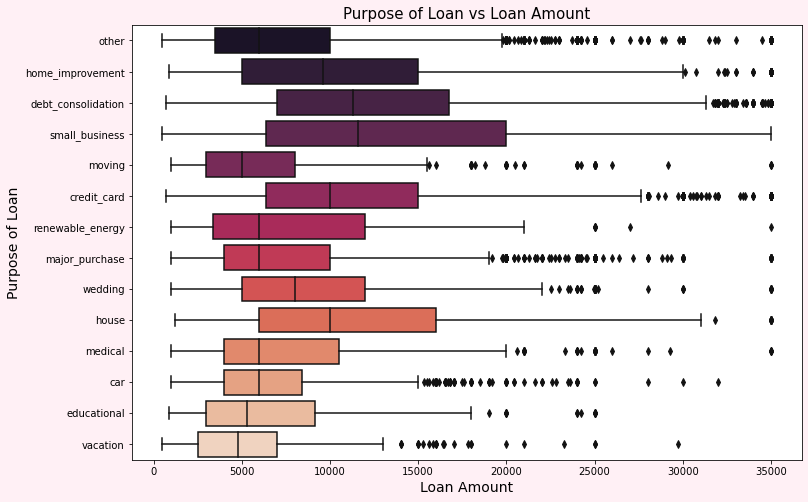

In [51]:
# Bivariate Analysis - Puprose of loan vs Loan amount
# Box Plot

plt.figure(figsize=(12,8),facecolor='lavenderblush')
ax = sns.boxplot(y='purpose', x='loan_amnt', data =df_loan,palette='rocket')
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='k')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'k')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'k')
plt.show()



#### Observations:
> Median,75th percentile and 95th percentile of loan amount is highest for loan taken for 'small business' among all purposes, followed by 'Debt consolidation'. 

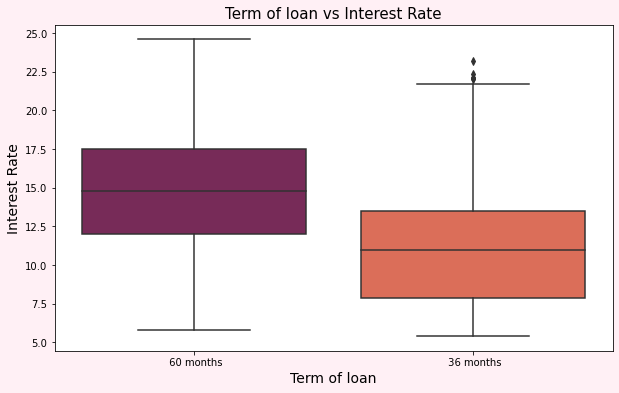

In [52]:
# Bivariate Analysis - Term of loan vs Interest Rate
# Box Plot

plt.figure(figsize=(10,6),facecolor='lavenderblush')
ax = sns.boxplot(y='int_rate', x='term', data =df_loan,palette='rocket')
ax.set_title('Term of loan vs Interest Rate',fontsize=15,color='k')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'k')
ax.set_xlabel('Term of loan',fontsize=14,color = 'k')
plt.show()



#### Observations:
> It is clear that avearge intrest rate is higher for 60 months loan term.

> Most of the loans issued for longer term had higher intrest rates for repayement.

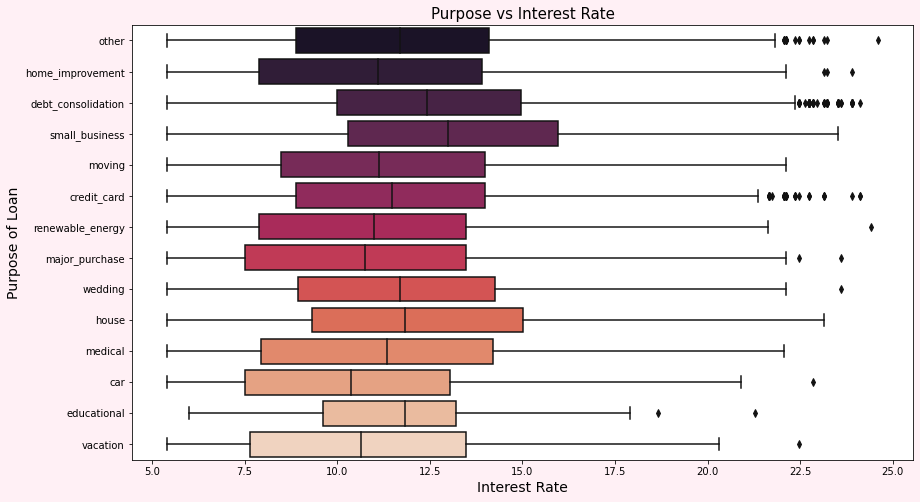

In [53]:
# Bivariate Analysis - Purpose vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='lavenderblush')
ax = sns.boxplot(x='int_rate', y='purpose', data =df_loan,palette='rocket')
ax.set_title('Purpose vs Interest Rate',fontsize=15,color='k')
ax.set_xlabel('Interest Rate',fontsize=14,color = 'k')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'k')
plt.show()



#### Observations:
> Small business purpose is having highest avearge intrest rate. Loans taken for small business purposes have to repay the loan with more intrest rate as compared to other.

> Debt consolidation is in second place where borrowers have to pay more interest rate.

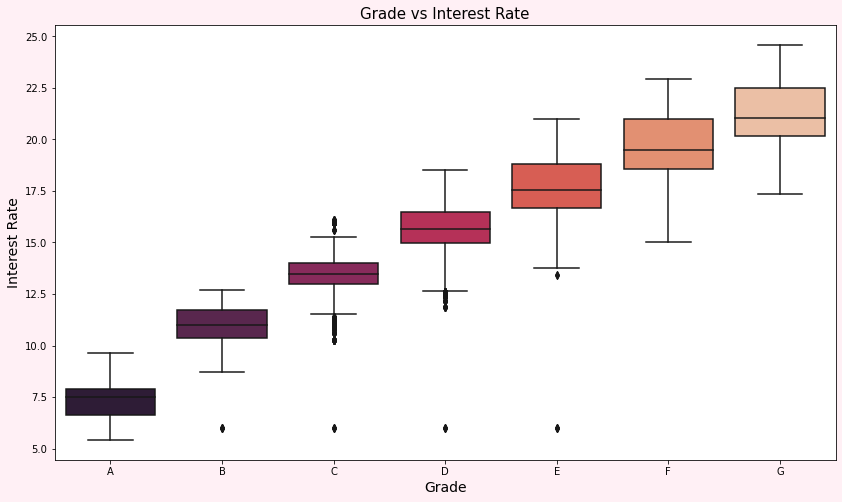

In [54]:
# Bivariate Analysis - Grade vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='lavenderblush')
ax = sns.boxplot(y='int_rate', x='grade', data =df_loan, palette='rocket',order = 'ABCDEFG')
ax.set_title('Grade vs Interest Rate',fontsize=15,color='k')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'k')
ax.set_xlabel('Grade',fontsize=14,color = 'k')
plt.show()



#### Observations:
> 'A-grade' is the top grade for a lender to assign to a borrower and 'G-grade' the lowest.

> The higher the borrower's credit grade,the lower the interest rate offered to that borrower on a loan.

> It is clear that intrest rate is increasing with grades moving from A to G.

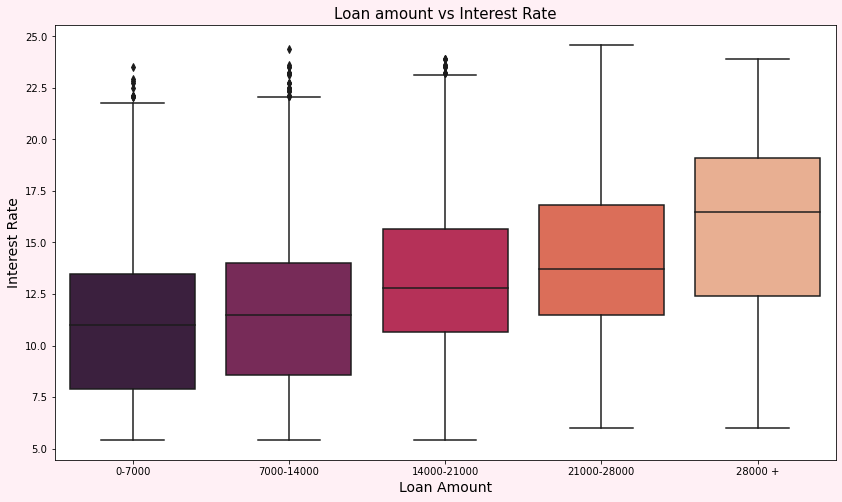

In [55]:
# Bivariate Analysis - Loan Amount vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='lavenderblush')
ax = sns.boxplot(y='int_rate', x='loan_amnt_cats', data =df_loan,palette='rocket')
ax.set_title('Loan amount vs Interest Rate',fontsize=15,color='k')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'k')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'k')
plt.show()



#### Observations:
> It is clear that interest rate is increasing with loan amount increase.

> When loan amount is more and it is taken for longer loan term, the interest rate will be high.

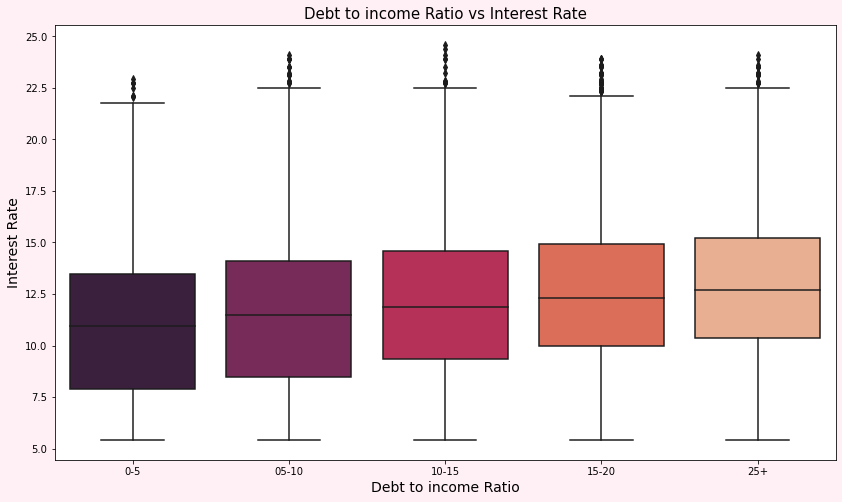

In [56]:
# Bivariate Analysis - dti vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='lavenderblush')
ax = sns.boxplot(y='int_rate', x='dti_cats', data =df_loan,palette='rocket')
ax.set_title('Debt to income Ratio vs Interest Rate',fontsize=15,color='k')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'k')
ax.set_xlabel('Debt to income Ratio',fontsize=14,color = 'k')
plt.show()



#### Observations:
> If DTI is low, chances are there to get a lower interest rate.

> Plot shows slight increase in interest rate with increase in DTI.

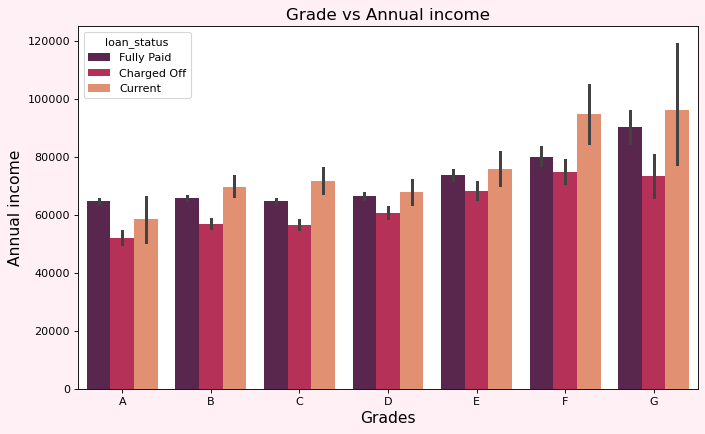

In [57]:
# Bivariate analysis
# BarPlot to show variation of annual income across grade for every loan status.

plt.figure(figsize=(10,6), dpi=80, facecolor='lavenderblush', edgecolor='k')
#plt.figure(figsize=(10,6),  facecolor='b')
ax=sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=df_loan, estimator=np.mean,order='ABCDEFG', palette = 'rocket')
#ax=sns.barplot(x='grade', hue="loan_status", data=df_loan)
ax.set_title('Grade vs Annual income',fontsize=15,color='k')
ax.set_ylabel('Annual income',fontsize=14,color = 'k')
ax.set_xlabel('Grades',fontsize=14,color = 'k')
plt.show()



#### Observations:
> From this we can conclude that the ones getting 'charged off' have lower annual incomes than the ones who'paid fully' for each and every grade (i.e. at same interest range)

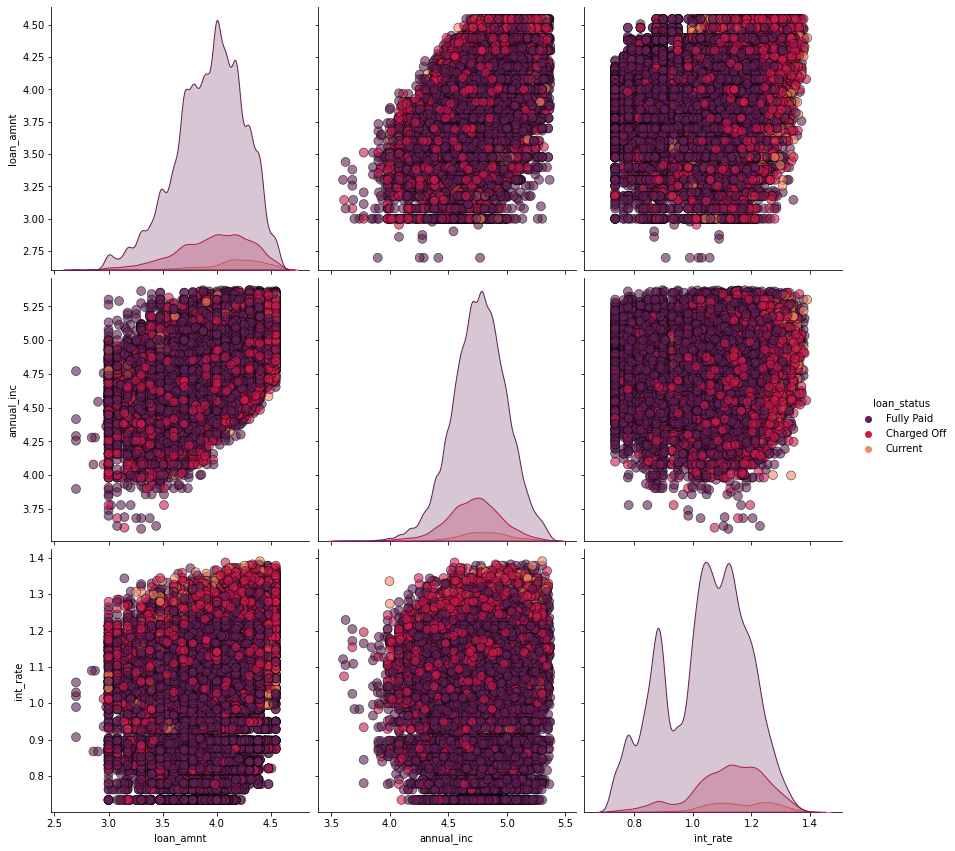

In [58]:
# Lets draw a pair plot for multivariate analysis
# Pick few imporatnt columns from dataset separately.

loan_pair = df_loan[['loan_amnt', 'annual_inc', 'int_rate','loan_status']].copy()
loan_pair.head()

# Take the log of below variables as they are heavily skewed
loan_pair['loan_amnt'] = np.log10(loan_pair['loan_amnt'])
loan_pair['annual_inc'] = np.log10(loan_pair['annual_inc'])
loan_pair['int_rate'] = np.log10(loan_pair['int_rate'])

# Create a pair plot colored by loan status with a density plot of the # diagonal and format the scatter plots.
sns.pairplot(loan_pair, hue = 'loan_status', palette = 'rocket', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4)
plt.show()



#### Observations:

> Higher the intrest rate, higher charged off ratio.

> Higher the annual income, higher the loan amount slightly.
 
> intrest rate is increasing with loan amount increase.

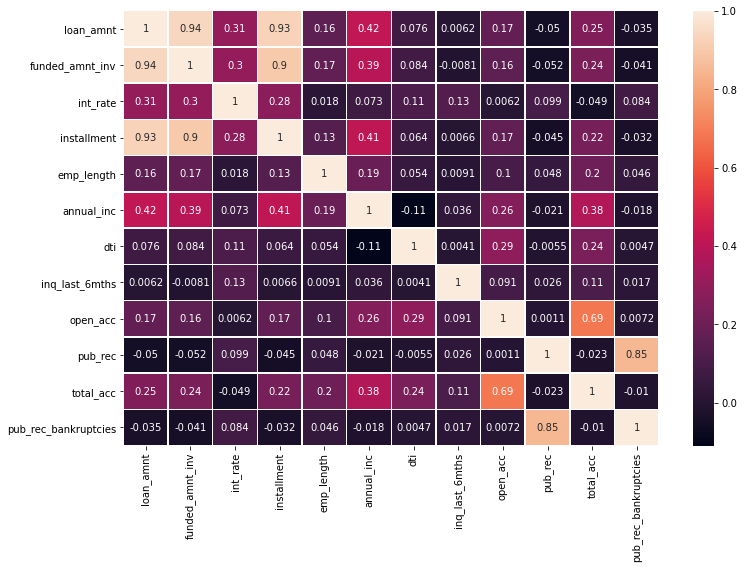

In [59]:
plt.figure(figsize=(12,8))
sns.heatmap(df_loan.corr(),annot=True,linewidth = 0.5, cmap='rocket')
plt.show()

#### Observations

> Loan amount, funding amount and installment are strongly correlated.

> Annual income with DTI(Debt-to-income ratio) is negatively correlated.

> Debt income ratio is the percentage of a consumer's monthly gross income that goes toward paying debts. 

> That means when annual income is low DTI is high & vice versa.